In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, ks_2samp, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [31]:
spy_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\SPY_trades_0107.parquet')
qqq_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\QQQ_trades_0107.parquet')
vxx_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\VXX_trades_0107.parquet')
vrsk_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\VRSK_trades_0107.parquet')
fast_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\FAST_trades_0107.parquet')
anss_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\ANSS_trades_0107.parquet')
mrvl_trades_0107 = pd.read_parquet(r'C:\Users\Эвелина Новикова\MRVL_trades_0107.parquet')

mrvl_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\MRVL_0625.parquet')
spy_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\SPY_0625.parquet')
qqq_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\QQQ_0625.parquet')
vxx_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\VXX_0625.parquet')
vrsk_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\VRSK_0625.parquet')
anss_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\ANSS_0625.parquet')
fast_trades_2506 = pd.read_parquet(r'C:\Users\Эвелина Новикова\FAST_0625.parquet')

In [33]:
def trades_volume_preparation(trades: pd.DataFrame) -> pd.DataFrame:
    trades['volume'] = trades['trade_volume_A'] + trades['trade_volume_B'] + trades['trade_volume_N']
    return pd.DataFrame(trades['volume'])

In [35]:
trades_0107_dfs = {'SPY': spy_trades_0107, 'QQQ': qqq_trades_0107, 'VXX': vxx_trades_0107, 'VRSK': vrsk_trades_0107,
              'FAST': fast_trades_0107, 'ANSS': anss_trades_0107, 'MRVL': mrvl_trades_0107}
volumes_0107 = pd.DataFrame()
for instrument in trades_0107_dfs.keys():
    volume = trades_volume_preparation(trades_0107_dfs[instrument])
    volume.columns = [f'volume_{instrument}']
    volumes_0107 = volumes_0107.join(volume, how="outer")
    volumes_0107 = volumes_0107.fillna(0)

trades_2506_dfs = {'SPY': spy_trades_2506, 'QQQ': qqq_trades_2506, 'VXX': vxx_trades_2506, 'VRSK': vrsk_trades_2506,
              'FAST': fast_trades_2506, 'ANSS': anss_trades_2506, 'MRVL': mrvl_trades_2506}

volumes_2506 = pd.DataFrame()
for instrument in trades_2506_dfs.keys():
    volume = trades_volume_preparation(trades_2506_dfs[instrument])
    volume.columns = [f'volume_{instrument}']
    volumes_2506 = volumes_2506.join(volume, how="outer")
    volumes_2506 = volumes_2506.fillna(0)

In [37]:
volumes_2506.head()

,volume_SPY,volume_QQQ,volume_VXX,volume_VRSK,volume_FAST,volume_ANSS,volume_MRVL
ts_event,,,,,,,
2025-06-25 08:00:10.700,0.0,60.0,0.0,0.0,0.0,0.0,0.0
2025-06-25 08:00:10.800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-25 08:00:10.900,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-25 08:00:11.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-25 08:00:11.100,210.0,208.0,0.0,0.0,0.0,0.0,0.0


In [41]:
volumes_0107.head()

,volume_SPY,volume_QQQ,volume_VXX,volume_VRSK,volume_FAST,volume_ANSS,volume_MRVL
ts_event,,,,,,,
2025-07-01 08:00:00.200,0.0,54.0,0.0,0.0,0.0,0.0,0.0
2025-07-01 08:00:00.300,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-07-01 08:00:00.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-07-01 08:00:00.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-07-01 08:00:00.600,0.0,0.0,0.0,0.0,0.0,0.0,0.0


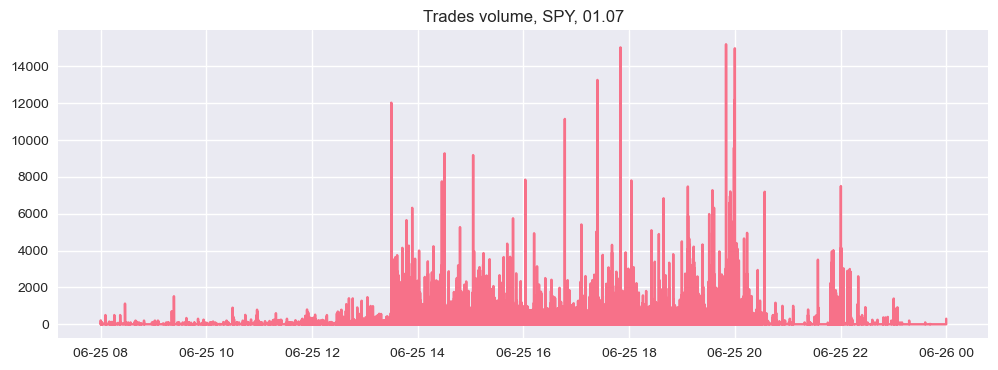

In [65]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_2506['volume_SPY'])
plt.title('Trades volume, SPY, 01.07')
plt.grid(True)
plt.show()

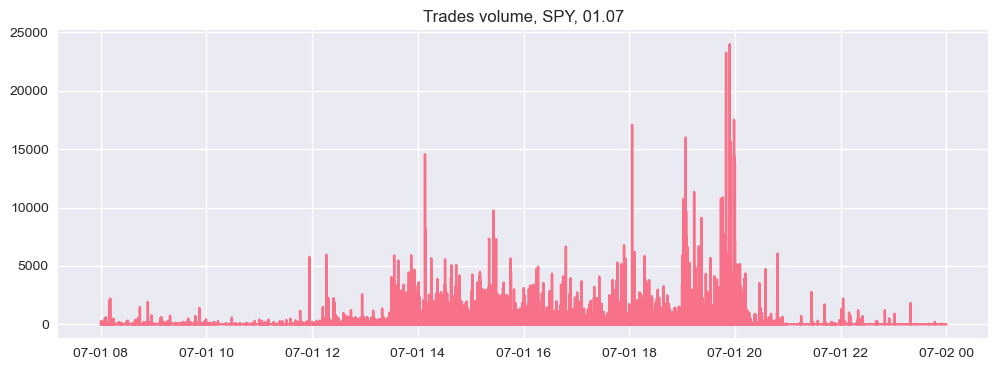

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_0107['volume_SPY'])
plt.title('Trades volume, SPY, 01.07')
plt.grid(True)
plt.show()

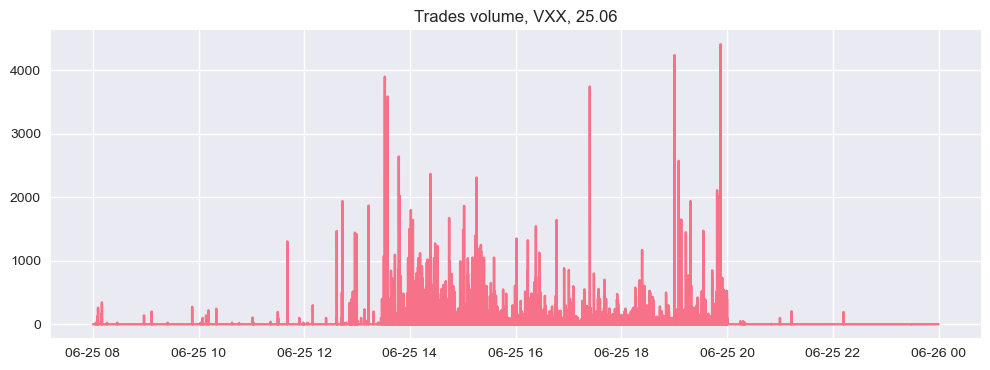

In [61]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_2506['volume_VXX'])
plt.title('Trades volume, VXX, 25.06')
plt.grid(True)
plt.show()

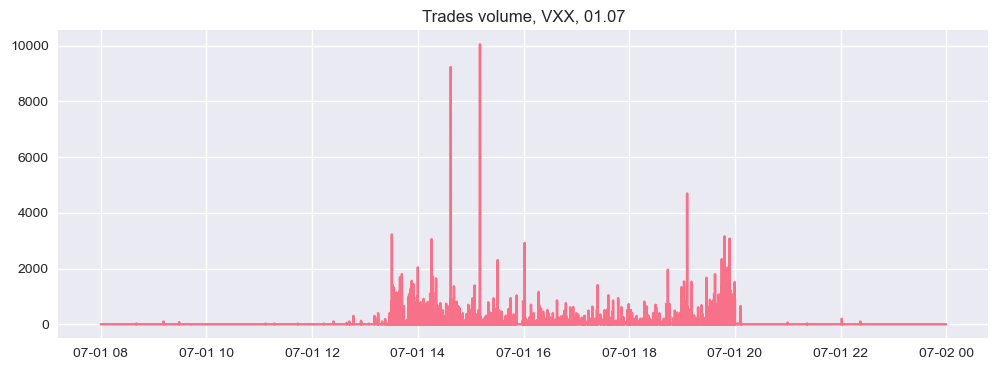

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_0107['volume_VXX'])
plt.title('Trades volume, VXX, 01.07')
plt.grid(True)
plt.show()

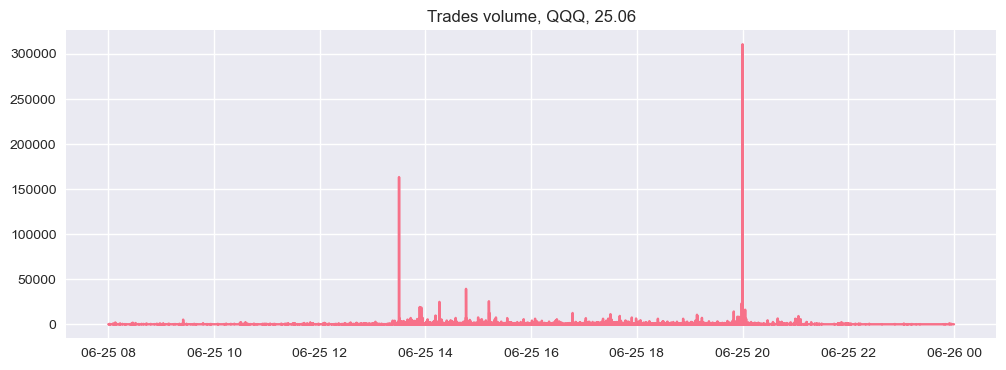

In [57]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_2506['volume_QQQ'])
plt.title('Trades volume, QQQ, 25.06')
plt.grid(True)
plt.show()

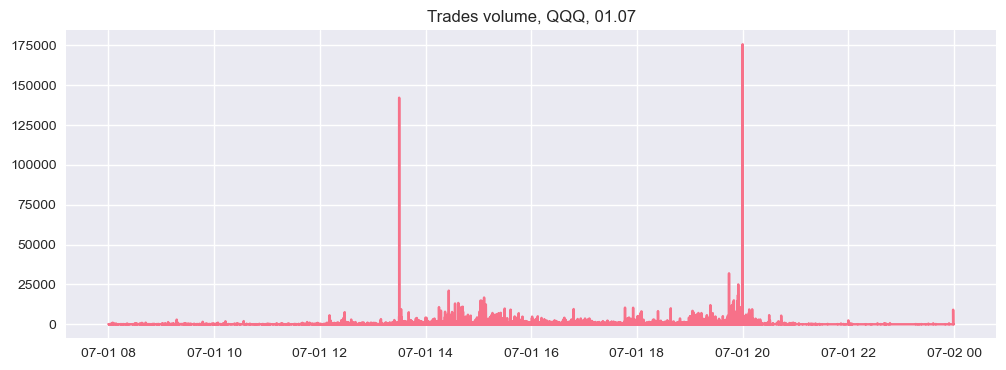

In [55]:
plt.figure(figsize=(12, 4))
plt.plot(volumes_0107['volume_QQQ'])
plt.title('Trades volume, QQQ, 01.07')
plt.grid(True)
plt.show()

### Гипотеза - объемы торгов в период 14-20 часов выше, чем в остальные

In [68]:
### используем непараметрические тесты, тк распределение объёмов мало похоже на нормальное и имеет тяжелые хвосты

In [ ]:
def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    total = len(x) * len(y)
    greater = np.sum(x[:, None] > y)
    smaller = np.sum(x[:, None] < y)
    return (greater - smaller) / total

In [ ]:
def permutation_test(x, y, n_perm=2000, seed=42):
    np.random.seed(seed)
    
    x = np.array(x)
    y = np.array(y)
    
    obs_diff = x.mean() - y.mean()
    combined = np.concatenate([x, y])
    
    count = 0
    for _ in range(n_perm):
        np.random.shuffle(combined)
        x_new = combined[: len(x)]
        y_new = combined[len(x):]
        diff = x_new.mean() - y_new.mean()
        if abs(diff) >= abs(obs_diff):
            count += 1
    
    return count / n_perm


In [152]:
def analyze(df, ticker):

    result = 'Succes!'

    data = df[f'{ticker}'].copy()
    data.index = data.index.strftime('%H:%M')
    data = data.reset_index()

    mask_peak = data["ts_event"].between(14, 20)     # окно 14–20
    mask_other = ~mask_peak
    
    x = data.loc[mask_peak, f'{ticker}']
    y = data.loc[mask_other, f'{ticker}']
    
    # Mann–Whitney
    mw = mannwhitneyu(x, y, alternative="greater")
    print(f"Mann–Whitney U p-value: {mw.pvalue:.4g}")
    
    # KS test
    ks = ks_2samp(x, y)
    print(f"KS test p-value: {ks.pvalue:.4g}")
    
    # Cliff’s delta
    cd = cliffs_delta(x, y)
    print(f"Cliff's Delta: {cd:.3f}")
    
    # Permutation test 
    p_perm = permutation_test(x, y, n_perm=3000)
    print(f"Permutation test p-value: {p_perm:.4g}")
    
    # Kruskal–Wallis по часам 
    hourly_groups = [g[f'{ticker}'].values for _, g in data.groupby("ts_event")]
    kw = kruskal(*hourly_groups)
    print(f"Kruskal–Wallis p-value: {kw.pvalue:.4g}")
    
    # Регрессия
    data["peak"] = mask_peak.astype(int)
    
    model = ols("volume ~ peak", data=data).fit(cov_type="HC3")  # робастные ошибки
    print(model.summary())

    return result


In [100]:
volumes = ['volume_SPY', 'volume_QQQ', 'volume_VXX', 'volume_VRSK',	'volume_FAST', 'volume_ANSS', 'volume_MRVL']